# MNIST Dataset Analysis

The MNIST dataset is a classic dataset in machine learning, consisting of handwritten digits from 0 to 9. It is widely used for training and testing various image processing algorithms. This notebook demonstrates how to load and explore the MNIST dataset using TensorFlow.

## Dataset Attribution

The MNIST dataset was introduced in the following paper:

**Title:** Gradient-Based Learning Applied to Document Recognition  
**Authors:** Yann LeCun, Léon Bottou, Yoshua Bengio, and Patrick Haffner  
**Journal:** Proceedings of the IEEE  
**Volume:** 86  
**Number:** 11  
**Pages:** 2278–2324  
**Year:** 1998

Please refer to this paper for more details on the dataset and its use.

# Import Libraries

The first step in this project is to import the libraries that will be needed hereafter.

In [12]:
from keras import layers
from keras import models
from keras.datasets import mnist
from keras.utils import to_categorical
from matplotlib import pyplot as plt
import numpy as np
import random

# Load Dataset

Keras comes built-in with various datasets, one of them being the MNIST Dataset. This is the dataset I will be working for this project.

In [13]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Now that I have the images and the labels, I now want to know the data types of the images and labels. The result is they're all NumPy Arrays.

In [14]:
print(type(train_images))
print(type(train_labels))
print(type(test_images))
print(type(test_labels))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


Now I want to analyze the shapes of all the different NumPy Arrays. This will be helpful later on, once we start working with **Data Pre-Processing**.

In [15]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


# Data Pre-Processing

In order to start working with the data, I first have to **reshape** the data and then **normalize** it.

## Data Reshaping

The reasoning behind reshaping the data is because neural networks, especially those designed for image classification, often expect input data in a specific format. The MNIST dataset consists of grayscale images of handwritten digits, each of size **28x28** pixels. The raw image data is stored as a **2D array** of shape **(28, 28)**, but neural networks typically expect input data in a **4D tensor** format, especially when using deep learning frameworks. The format of this **4D tensor** is [batch_size, height, width, channels].

The elements in the 4D tensor are explained below:
  - Batch Size: This dimension represents the number of images in a batch.
  - Height and Width: These dimensions represent the spatial dimensions of the image.
  - Channels: This dimension represents the color channels of the image. For grayscale images, this is 1, while for RGB images, it would be 3.

## Data Normalization

To ensure effective neural network training, pixel values are often normalized from the range [0, 255] to [0, 1]. This normalization process involves dividing by 255, a step that is necessary because pixel values are originally represented in an 8-bit format, known in NumPy as 'numpy.uint8'. This format uses integers ranging from 0 to 255, as an 8-bit value can represent 256 distinct states (from 0 to 255).

To perform normalization, these integer values need to be converted to a floating-point type, such as 'float32'. This conversion is crucial because dividing integers directly can lead to precision issues. By converting to float and then dividing by 255, each pixel value is scaled to a decimal between 0 and 1.

In the context of RGB images, where each color channel has 256 possible values, the total number of color combinations is 256^3. However, for grayscale images, we only need to consider the 256 possible values for a single channel.

## Convert categorical labels to one-hot encoded format

The 'to_categorical' method converts the Labels NumPy Array into an array containing multiple arrays (also called an object array). This applies a one-hot encoding format to each object (arrays) inside the main NumPy object Array.

In [16]:
train_images = train_images.reshape((train_images.shape[0], 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((test_images.shape[0], 28 * 28)).astype('float32') / 225

train_labels = to_categorical(train_labels)
test_labels  = to_categorical(test_labels)

# Predictive Analytics

## Introduction to the model

The TensorFlow (or Keras) Sequential model is a linear stack of layers where each layer has exactly one input tensor and one output tensor, designed for building simple, straightforward neural networks in a step-by-step manner.

## Creating an instance of the model

The first step in creating and working with the model is to create an instance of the Sequential model.

## Add layers to the model

The next step is to add layers to the model. The model has a total of three layers. The input layer, the hidden layer, and the output layer.

**The input layer** is created implicitly by **the first Dense layer**. The input shape is specified in **the first Dense layer**, which implicitly defines the input layer. The input layer consists of 784 neurons (since the input images are 28x28 pixels, flattened to a single vector of 784 pixels).

**The first Dense layer**, or **the hidden layer**, acts as an intermediate layer that processes the input data, allowing the network to learn complex representations of the input. It contains **512 units (or neurons)** and uses the ReLu activation function. **The ReLU (Rectified Linear Unit)** is a popular **activation function** because it introduces non-linearity to the model while being computationally efficient.

**The second Dense layer**, or **the output layer**, produces the final output of the network, which in this case is a probability distribution over the 10 classes (digits 0-9). It contains **10 units (or neurons)** (10 classes) and uses the softmax activation function. **The softmax activation function** is used in **the output layer** for multi-class classification problems.

## Compile the model

The next step is to compile the model. Compiling a model configures it for training by specifying the optimizer, loss function, and metrics to be evaluated. This step translates the model's high-level architecture into a format suitable for training and evaluation.

### Optimizer

The **optimizer** used in this model is the **RMSprop (Root Mean Square Propagation) Optimizer**. RMSprop is particularly effective for training deep neural networks.

### Loss Function

The **loss function** used in this model is the **Categorical Crossentropy Loss Function**. This is the standard loss function used for multi-class classification problems where the target variable is one-hot encoded (as is the case with the MNIST Dataset).

### Metrics

The metric used to evaluate this model is **Accuracy**. Accuracy measures the proportion of correctly classified samples out of the total samples. It is a commonly used metric for classification tasks.

## Fit the model

The final step in creating our model is to fit the model. The `.fit()` method initiates the training process on the provided data.

In [17]:
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28, )))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics = ['accuracy'])

model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8727 - loss: 0.4413
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9669 - loss: 0.1150
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9807 - loss: 0.0696
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9855 - loss: 0.0503
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9900 - loss: 0.0357


# Predicting the value of a single, random image

## Define the Process Image Function

The first step in this stage is to define the **Process Image function** which pre-processes the image in order to change the image's dimensions.

The `.flatten()` method converts a multi-dimensional image array into a one-dimensional array.

The `np.expand_dims()` expression adds an extra dimension to the array at the specified axis. By adding a new axis at the 0th position, it essentially converts the **1D array** into a **2D array** where the first dimension is 1. This is used to make the image compatible with machine learning models that expect a batch dimension.

The function then returns the image.

## Select a random image (and pass it to the function)

The next step is to select a random image from the dataset.

## Display the image

After the image is selected, the next step is to use the **Matplotlib** library to plot the image.

## Get the predicted value (label)

In order to test the predictions on a more granular level, we apply the `.predict()` method to the pre-processed image. This will only get the prediction of a single image and allow us to see both the image and the predicted integer-equivalent value (label), as well as the probability of the selected class.

In [18]:
def preprocess_image(image):
    image = image.flatten()
    image = np.expand_dims(image, axis=0)

    return image

In [19]:
random_num = random.randint(0, len(test_images))

single_image = test_images[random_num]
preprocessed_image = preprocess_image(single_image)
print("Preprocessed image shape:", preprocessed_image.shape)

Preprocessed image shape: (1, 784)


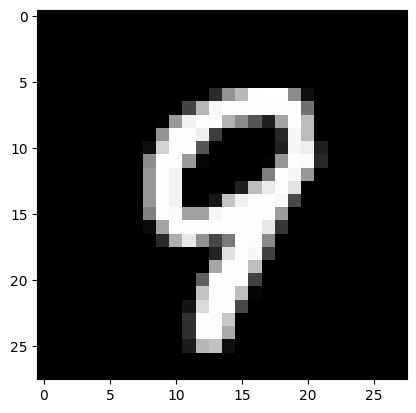

In [20]:
first_image = np.array(preprocessed_image, dtype='float')
pixels = first_image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()

In [21]:
try:
    predictions = model.predict(preprocessed_image)
    #print('These are the predictions:')
    #print(predictions)

    predicted_class = np.argmax(predictions)
    print(f'Predicted class: {predicted_class}')

    print(f'This is the probability: {predictions.max()}')
except Exception as e:
    print(f"Error during prediction: {e}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Predicted class: 9
This is the probability: 0.9996776580810547


# Metrics

Finally, we want to evaluate the accuracy of our model. To do this, we apply the evaluate method upon our model and pass the test images and labels as parameters.

## Test Loss

The Test Loss Function is a measure of how well a trained machine learning model performs on the test set. The test loss helps evaluate the generalization ability of the model. A lower test loss indicates that the model's predictions are closer to the true labels, suggesting that the test set has a good performance.

## Metrics

The **Accuracy metric**, as mentioned previously, measures the proportion of correctly classified samples out of the total samples. The Accuracy of the test dataset can be seen below.

In [22]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc * 100}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step - accuracy: 0.9770 - loss: 0.0748
Test Loss: 0.06127774715423584
Test Accuracy: 98.18999767303467%
